In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import *

## Checking for cells with part cut off

In [115]:
pos = 4

data = np.load('exp249_bf/%03d.npy' % pos)
data[data>=0.5] = 1
data[data<0.5] = 0
data = data[:, :, :, 1]

img = cv2.imread('tif-cropped/whi5-myo1-20120608T240XY%02dC2.tif' % pos, cv2.IMREAD_GRAYSCALE)

regions = regionprops(label(data[240]), img)

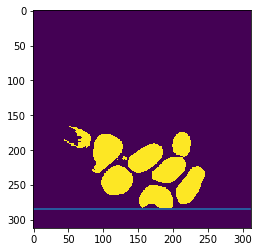

In [116]:
# find where in image is cropped
y_limit = [len(np.unique(img[n]))==1 for n in range(0, 312)].index(True)

plt.imshow(data[240])
plt.plot([0, 311], [y_limit, y_limit])

## Pixel Normalization

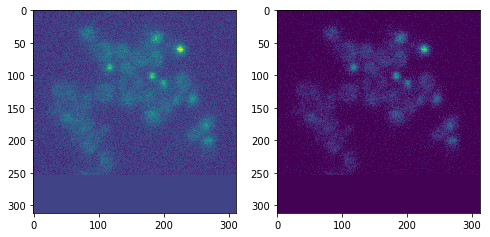

In [41]:
orig = cv2.imread('tif-cropped/whi5-myo1-20120608T090XY01C2.tif', cv2.IMREAD_GRAYSCALE)
norm = orig.copy()

med_pix = np.median(regionprops(label(data[89], background=1), orig)[0].intensity_image)

norm = norm - med_pix

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(orig, vmin=0, vmax = 250)
ax[1].imshow(norm, vmin=0, vmax = 250)

## In-depth look at intensity imaging

In [2]:
data = np.load('exp249_bf/002.npy')
data[data>=0.5] = 1
data[data<0.5] = 0
data = data[:, :, :, 1]

In [21]:
segmented_img = data[89]
segmented_img = segmented_img.astype(int)

result = orig.copy()
result[segmented_img==0] = 0

Text(0.5,1,'Segmented GFP Image')

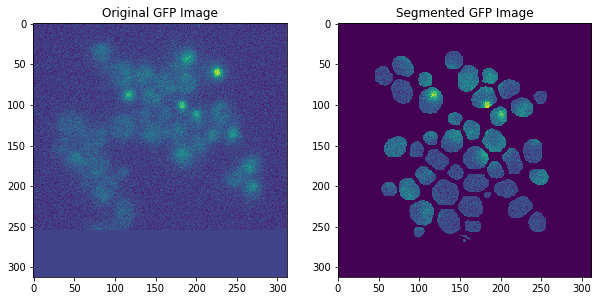

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img)
ax[0].set_title('Original GFP Image')
ax[1].imshow(result)
ax[1].set_title('Segmented GFP Image')

40.76631578947369


Text(0.5,1,'Magnified Cell (GFP)')

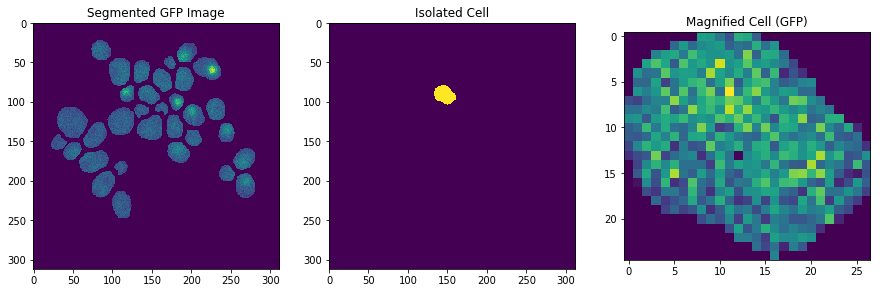

In [91]:
label_id = 9

regions = regionprops(label(segmented_img), intensity_image = t_img)

print(regions[label_id].mean_intensity)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))

props1 = regions[label_id]
props1_bbox = props1.bbox
props1_img = np.zeros((312, 312), dtype=int)
props1_img[props1_bbox[0]:props1_bbox[2], props1_bbox[1]:props1_bbox[3]] = props1.image
ax[0].imshow(result)
ax[0].set_title('Segmented GFP Image')
ax[1].imshow(props1_img)
ax[1].set_title('Isolated Cell')
ax[2].imshow(props1.intensity_image)
ax[2].set_title('Magnified Cell (GFP)')

## Finding 9x9 with greatest intensity

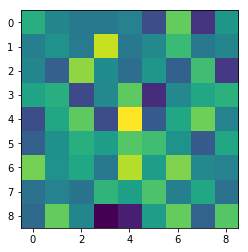

In [201]:
intensity_img = props1.intensity_image.copy()
max_intensity = intensity_img.max()
x, y = np.where(intensity_img == max_intensity)
y = y[0]
x = x[0]
bright = intensity_img[x-2:x+3, y-2:y+3]

a = intensity_img.copy()

area_size = 4
xsize=a.shape[1]
ysize=a.shape[0]
b = np.array([[np.mean(a[y-area_size:y+area_size+1, x-area_size:x+area_size+1]) for y in range(area_size, ysize-area_size)] for x in range(area_size, xsize-area_size)])
maxcenterx = np.unravel_index(b.argmax(), b.shape)[0]+area_size
maxcentery = np.unravel_index(b.argmax(), b.shape)[1]+area_size

plt.imshow(a[maxcentery-area_size:maxcentery+area_size+1, maxcenterx-area_size:maxcenterx+area_size+1])